<a href="https://colab.research.google.com/github/Bertone-Fabio/mldl2024/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import gdown
import shutil

URLS = {
    "tokyo_xs": "https://drive.google.com/file/d/15QB3VNKj93027UAQWv7pzFQO1JDCdZj2/view?usp=share_link",
    "sf_xs": "https://drive.google.com/file/d/1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y/view?usp=share_link",
    "gsv_xs": "https://drive.google.com/file/d/1q7usSe9_5xV5zTfN-1In4DlmF5ReyU_A/view?usp=share_link"
}


os.makedirs("data", exist_ok=True)
for dataset_name, url in URLS.items():
    print(f"Downloading {dataset_name}")
    zip_filepath = f"data/{dataset_name}.zip"
    gdown.download(url, zip_filepath, fuzzy=True)
    shutil.unpack_archive(zip_filepath, extract_dir="data")
    os.remove(zip_filepath)

Downloading...
From (original): https://drive.google.com/uc?id=15QB3VNKj93027UAQWv7pzFQO1JDCdZj2
From (redirected): https://drive.google.com/uc?id=15QB3VNKj93027UAQWv7pzFQO1JDCdZj2&confirm=t&uuid=e67b0b5c-7427-4462-a4c4-36b22d6c3297
To: /content/data/tokyo_xs.zip
100%|██████████| 141M/141M [00:07<00:00, 17.7MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y
From (redirected): https://drive.google.com/uc?id=1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y&confirm=t&uuid=82823fff-ca9c-4dfb-8c87-52187c6514eb
To: /content/data/sf_xs.zip
100%|██████████| 1.03G/1.03G [00:52<00:00, 19.6MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1q7usSe9_5xV5zTfN-1In4DlmF5ReyU_A
From (redirected): https://drive.google.com/uc?id=1q7usSe9_5xV5zTfN-1In4DlmF5ReyU_A&confirm=t&uuid=c0352e27-0e42-4905-b4f6-3a37b8d530c9
To: /content/data/gsv_xs.zip
100%|██████████| 5.67G/5.67G [02:25<00:00, 39.1MB/s]


In [2]:
!pip install pytorch_lightning
!pip install pytorch_metric_learning
!pip install faiss-cpu==1.7.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 35.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [36]:
# Clone repository
!git clone https://github.com/Bertone-Fabio/mldl2024.git

fatal: destination path 'mldl2024' already exists and is not an empty directory.


In [55]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 363 bytes | 363.00 KiB/s, done.
From https://github.com/Bertone-Fabio/mldl2024
   400422e..71ab661  main       -> origin/main
Updating 400422e..71ab661
Fast-forward
 utils/validation.py | 3 ++-
 1 file changed, 2 insertions(+), 1 deletion(-)


In [56]:
# Cambia directory nel repository clonato
%cd /content/mldl2024

# Importa la funzione dal file utilities.py
import utils
from dataset.test_dataset import TestDataset
from dataset.train_dataset import TrainDataset

/content/mldl2024


In [58]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 29.1 MB/s eta 0:00:00


In [57]:
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks import ModelCheckpoint
from torchvision import transforms as tfm
import torchvision.models
from torch.optim import lr_scheduler
from torch import nn
import logging
import numpy as np

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

class VPRModel(pl.LightningModule):
    """This is the main model for Visual Place Recognition
    we use Pytorch Lightning for modularity purposes.
    """

    def __init__(self,
                #---- Aggregator
                agg_arch='ConvAP', #CosPlace, NetVLAD, GeM, avgpool
                agg_config={},

                #---- Datasets
                val_dataset = None,
                test_dataset = None,

                #---- Train hyperparameters
                lr=0.03,
                optimizer='sgd',
                weight_decay=1e-3,
                momentum=0.9,
                warmpup_steps=500,
                milestones=[5, 10, 15],
                lr_mult=0.3,

                #----- Loss
                loss_name='MultiSimilarityLoss',
                miner_name='MultiSimilarityMiner',
                miner_margin=0.1,
                faiss_gpu=False
                 ):
        super().__init__()
        self.agg_arch = agg_arch
        self.agg_config = agg_config

        self.val_dataset = val_dataset
        self.test_dataset = test_dataset

        self.lr = lr
        self.optimizer = optimizer
        self.weight_decay = weight_decay
        self.momentum = momentum
        self.warmpup_steps = warmpup_steps
        self.milestones = milestones
        self.lr_mult = lr_mult

        self.loss_name = loss_name
        self.miner_name = miner_name
        self.miner_margin = miner_margin

        self.save_hyperparameters() # write hyperparams into a file

        self.loss_fn = utils.get_loss(loss_name)
        self.miner = utils.get_miner(miner_name, miner_margin)
        self.batch_acc = [] # we will keep track of the % of trivial pairs/triplets at the loss level

        self.faiss_gpu = faiss_gpu

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.i = 0

        # ----------------------------------
        # get the backbone and the aggregator
                # get the backbone
        pretrained_model = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.DEFAULT)

        # modify backbone (cut at the third convolutional layer)
        self.backbone = nn.Sequential(
            pretrained_model.conv1,
            pretrained_model.bn1,
            pretrained_model.relu,
            pretrained_model.maxpool,
            pretrained_model.layer1,
            pretrained_model.layer2,
            pretrained_model.layer3,
        )
        self.aggregator = utils.get_aggregator(agg_arch, agg_config)


    # the forward pass of the lightning model
    def forward(self, x):
        x = self.backbone(x)
        x = self.aggregator(x)
        return x

    # configure the optimizer
    def configure_optimizers(self):
        if self.optimizer.lower() == 'sgd':
            optimizer = torch.optim.SGD(self.parameters(),
                                        lr=self.lr,
                                        weight_decay=self.weight_decay,
                                        momentum=self.momentum)
        elif self.optimizer.lower() == 'adamw':
            optimizer = torch.optim.AdamW(self.parameters(),
                                        lr=self.lr,
                                        weight_decay=self.weight_decay)
        elif self.optimizer.lower() == 'adam':
            optimizer = torch.optim.AdamW(self.parameters(),
                                        lr=self.lr,
                                        weight_decay=self.weight_decay)
        else:
            raise ValueError(f'Optimizer {self.optimizer} has not been added to "configure_optimizers()"')
        scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=self.milestones, gamma=self.lr_mult)
        return [optimizer], [scheduler]

    # configure the optizer step, takes into account the warmup stage
    # def optimizer_step(self,  epoch, batch_idx,
    #                     optimizer, optimizer_idx, optimizer_closure,
    #                     on_tpu, using_native_amp, using_lbfgs):
    #     # warm up lr
    #     if self.trainer.global_step < self.warmpup_steps:
    #         lr_scale = min(1., float(self.trainer.global_step + 1) / self.warmpup_steps)
    #         for pg in optimizer.param_groups:
    #             pg['lr'] = lr_scale * self.lr
    #     optimizer.step(closure=optimizer_closure)

    #  The loss function call (this method will be called at each training iteration)
    def loss_function(self, descriptors, labels):
        # we mine the pairs/triplets if there is an online mining strategy
        if self.miner is not None:
            miner_outputs = self.miner(descriptors, labels)
            loss = self.loss_fn(descriptors, labels, miner_outputs)

            # calculate the % of trivial pairs/triplets
            # which do not contribute in the loss value
            nb_samples = descriptors.shape[0]
            nb_mined = len(set(miner_outputs[0].detach().cpu().numpy()))
            batch_acc = 1.0 - (nb_mined/nb_samples)

        else: # no online mining
            loss = self.loss_fn(descriptors, labels)
            batch_acc = 0.0
            if type(loss) == tuple:
                # somes losses do the online mining inside (they don't need a miner objet),
                # so they return the loss and the batch accuracy
                # for example, if you are developping a new loss function, you might be better
                # doing the online mining strategy inside the forward function of the loss class,
                # and return a tuple containing the loss value and the batch_accuracy (the % of valid pairs or triplets)
                loss, batch_acc = loss

        # keep accuracy of every batch and later reset it at epoch start
        self.batch_acc.append(batch_acc)
        # log it
        self.log('b_acc', sum(self.batch_acc) /
                len(self.batch_acc), prog_bar=True, logger=True)
        return loss

    # This is the training step that's executed at each iteration
    def training_step(self, batch, batch_idx):
        places, labels = batch

        # Note that GSVCities yields places (each containing N images)
        # which means the dataloader will return a batch containing BS places
        BS, N, ch, h, w = places.shape

        # reshape places and labels
        images = places.view(BS*N, ch, h, w)
        labels = labels.view(-1)

        # Feed forward the batch to the model
        descriptors = self(images) # Here we are calling the method forward that we defined above
        loss = self.loss_function(descriptors, labels) # Call the loss_function we defined above

        self.log('loss', loss.item(), logger=True)
        return {'loss': loss}

    # This is called at the end of each training epoch
    def on_training_epoch_end(self, training_step_outputs):
        # we empty the batch_acc list for next epoch
        self.batch_acc = []

    # For validation, we will also iterate step by step over the validation set
    def validation_step(self, batch, batch_idx):
        print(f"validation_step: batch_idx = {batch_idx}")
        places, _ = batch
        # calculate descriptors
        descriptors = self(places)
        print("Val step desc type", type(descriptors))
        print("Val counter", self.i)
        self.i += 1
        self.validation_step_outputs.append(descriptors.detach().cpu())
        return descriptors.detach().cpu()

    def test_step(self, batch, batch_idx):
        places, _ = batch
        # calculate descriptors
        descriptors = self(places)
        self.test_step_outputs.append(descriptors.detach().cpu())
        return descriptors.detach().cpu()

    def on_validation_epoch_end(self):
        all_descriptors = torch.cat(self.validation_step_outputs, dim=0)
        self.validation_step_outputs.clear()
        return self.inference_epoch_end(all_descriptors, self.val_dataset, 'val')

    def on_test_epoch_end(self):
        all_descriptors = torch.cat(self.test_step_outputs, dim=0)
        self.test_step_outputs.clear()
        return self.inference_epoch_end(all_descriptors, self.test_dataset, 'test', self.num_preds_to_save)

    def inference_epoch_end(self, all_descriptors, inference_dataset, split, num_preds_to_save=0):
        """
        at the end of each validation epoch
        descriptors are returned in their order
        depending on how the validation dataset is implemented
        for this project, it is always references then queries.
        For example, if we have n references and m queries, we will get
        the descriptors for each val_dataset in a list as follows:
        [R1, R2, ..., Rn, Q1, Q2, ..., Qm]
        we then split it to references=[R1, R2, ..., Rn] and queries=[Q1, Q2, ..., Qm]
        to calculate recall@K using the ground truth provided.
        """

        print("ALL descrp",all_descriptors.shape)
        queries_descriptors = all_descriptors[inference_dataset.num_db_images  : ]
        database_descriptors = all_descriptors[ : inference_dataset.num_db_images ]



        print("db descrip shape",database_descriptors.shape)
        print("q descrip shape",queries_descriptors.shape)
        recalls_dict, predictions = utils.get_validation_recalls(
                                                eval_dataset = inference_dataset,
                                                db_desc = database_descriptors,
                                                q_desc =queries_descriptors,
                                                k_values=[1, 5],#, 10, 15, 20, 25],
                                                print_results=True,
                                                faiss_gpu=self.faiss_gpu
                                                )


        # print(recalls_str)
        # recalls_str = "".join([f"R@{k}: {rec:.2f} " for k, rec in recalls_dict.items()])

        # logging.info(f"Epoch[{self.current_epoch:02d}]): " +
        #               f"recalls: {recalls_str}")

        # self.log(f'{split}/R@1', recalls_dict[1], prog_bar=False, logger=True)
        # self.log(f'{split}/R@5', recalls_dict[5], prog_bar=False, logger=True)


if __name__ == '__main__':
    #pl.utilities.seed.seed_everything(seed=1, workers=True)

    # Parameters
    train_path = "/content/data/gsv_xs/train"
    img_per_place = 4
    min_img_per_place = 4
    val_path = "/content/data/sf_xs/val"
    test_path = "/content/data/sf_xs/test"
    batch_size = 64


    train_transform = tfm.Compose([
        tfm.RandAugment(num_ops=3),
        tfm.ToTensor(),
        tfm.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    train_dataset = TrainDataset(
        root_dir=train_path,
        images_per_place=img_per_place,
        minimum_images_per_place=min_img_per_place,
        transform=train_transform
    )
    val_dataset = TestDataset(root_dir=val_path)
    test_dataset = TestDataset(root_dir=test_path)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers = 2, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, num_workers=2, shuffle=False)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, num_workers=2, shuffle=False)






    model = VPRModel(
        #---------------------
        #---- Aggregator -----
        # agg_arch='CosPlace',
        # agg_config={'in_dim': 512,
        #             'out_dim': 512},
        # agg_arch='GeM',
        # agg_config={'p': 3},

        # agg_arch='ConvAP',
        # agg_config={'in_channels': 2048,
        #             'out_channels': 1024,
        #             's1' : 2,
        #             's2' : 2},
        agg_arch='avgpool',
        # ---- Datasets -----
        val_dataset = val_dataset,
        test_dataset = test_dataset,

        #-----------------------------------
        #---- Training hyperparameters -----
        #
        lr=0.0002, # 0.03 for sgd
        optimizer='adam', # sgd, adam or adamw
        weight_decay=0, # 0.001 for sgd or 0.0 for adam
        momentum=0.9,
        warmpup_steps=600,
        milestones=[5, 10, 15, 25],
        lr_mult=0.3,

        #---------------------------------
        #---- Training loss function -----
        # see utils.losses.py for more losses
        # example: ContrastiveLoss, TripletMarginLoss, MultiSimilarityLoss,
        # FastAPLoss, CircleLoss, SupConLoss,
        #
        loss_name='MultiSimilarityLoss',
        miner_name=None, # example: TripletMarginMiner, MultiSimilarityMiner, PairMarginMiner
        miner_margin=0.1,
        faiss_gpu=False
    )

    # # model params saving using Pytorch Lightning
    # # we save the best 3 models accoring to Recall@1 on pittsburg val
    # checkpoint_cb = ModelCheckpoint(
    #     monitor='pitts30k_val/R1',
    #     filename=f'{model.encoder_arch}' +
    #     '_epoch({epoch:02d})_step({step:04d})_R1[{pitts30k_val/R1:.4f}]_R5[{pitts30k_val/R5:.4f}]',
    #     auto_insert_metric_name=False,
    #     save_weights_only=True,
    #     save_top_k=3,
    #     mode='max',)


    # ------------------
    # we instanciate a trainer
    trainer = pl.Trainer(
        accelerator='gpu', devices=[0],
        #default_root_dir=f'./LOGS/{model.encoder_arch}', # Tensorflow can be used to viz

        num_sanity_val_steps=0, # runs N validation steps before stating training
        precision=16, # we use half precision to reduce  memory usage (and 2x speed on RTX)
        max_epochs=30,
        check_val_every_n_epoch=1, # run validation every epoch
        #callbacks=[checkpoint_cb],# we run the checkpointing callback (you can add more)
        reload_dataloaders_every_n_epochs=1, # we reload the dataset to shuffle the order
        log_every_n_steps=20,
        fast_dev_run=True # comment if you want to start training the network and saving checkpoints
    )

    # we call the trainer, and give it the model and the datamodule
    # now you see the modularity of Pytorch Lighning?

    trainer.validate(model=model, dataloaders=val_loader)#, ckpt_path=args.checkpoint)
    #else:
    trainer.fit(model=model,  train_dataloaders=train_loader, val_dataloaders=val_loader)
   # trainer.test(model=model, dataloaders=test_loader, ckpt_path='best')

/usr/local/lib/python3.10/dist-packages/lightning_fabric/connector.py:563: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded cod

Validation: |          | 0/? [00:00<?, ?it/s]

validation_step: batch_idx = 0
Val step desc type <class 'torch.Tensor'>
Val counter 0
ALL descrp torch.Size([64, 256])
db descrip shape torch.Size([64, 256])
q descrip shape torch.Size([0, 256])


AssertionError: 

In [45]:
import numpy as np
import faiss
import faiss.contrib.torch_utils
from prettytable import PrettyTable


def get_validation_recalls(eval_dataset, db_desc, q_desc, k_values, print_results=True, faiss_gpu=False):

        db_desc = db_desc.numpy()
        q_desc = q_desc.numpy()

        print("Tipo db",type(db_desc))
        print("tipo query",type(q_desc))

        embed_size = db_desc.shape[1]
        # if faiss_gpu:
        #     res = faiss.StandardGpuResources()
        #     flat_config = faiss.GpuIndexFlatConfig()
        #     flat_config.useFloat16 = True
        #     flat_config.device = 0
        #     faiss_index = faiss.GpuIndexFlatL2(res, embed_size, flat_config)
        # # build index
        # else:
        faiss_index = faiss.IndexFlatL2(embed_size)

        # add references
        faiss_index.add(db_desc)

        # search for queries in the index
        _, predictions = faiss_index.search(q_desc, max(k_values))



        # start calculating recall_at_k
        ground_truth = eval_dataset.get_positives()
        correct_at_k = np.zeros(len(k_values))
        for q_idx, pred in enumerate(predictions):
            for i, n in enumerate(k_values):
                # if in top N then also in top NN, where NN > N
                if np.any(np.in1d(pred[:n], ground_truth[q_idx])):
                    correct_at_k[i:] += 1
                    break

        correct_at_k = correct_at_k / len(predictions)
        d = {k:v for (k,v) in zip(k_values, correct_at_k)}

        if print_results:
            print('\n') # print a new line
            table = PrettyTable()
            table.field_names = ['K']+[str(k) for k in k_values]
            table.add_row(['Recall@K']+ [f'{100*v:.2f}' for v in correct_at_k])
            print(table.get_string(title=f"Performance on {dataset_name}"))

        return d, predictions


In [13]:
from glob import glob
x =  sorted(glob(f"/content/data/sf_xs/val/queries/**/*.jpg", recursive=True))

Input0: torch.Size([64, 4, 3, 224, 224])
Input: torch.Size([4, 3, 224, 224])


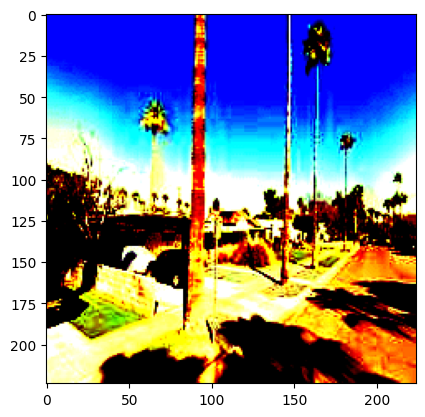

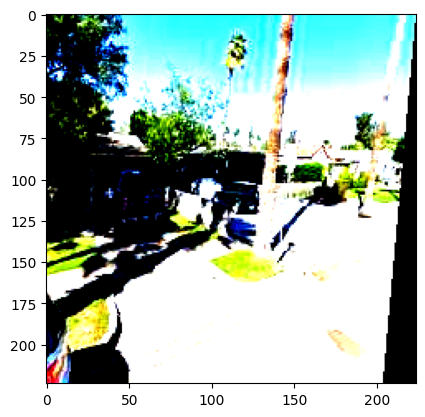

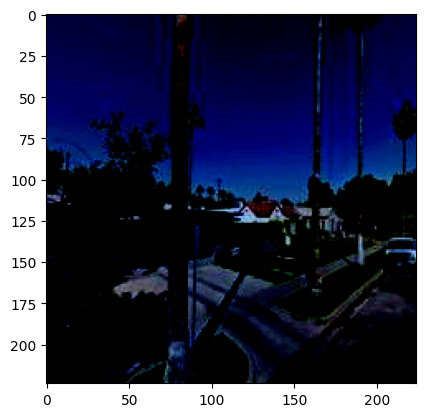

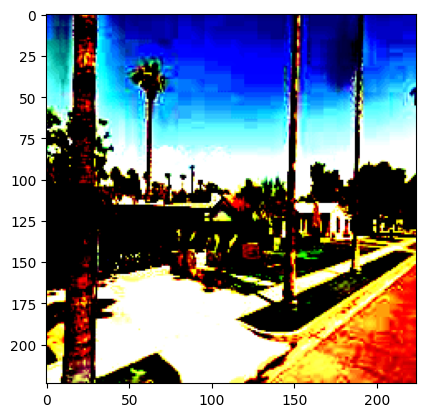

In [33]:
import matplotlib.pyplot as plt

for batch_idx, (inputs, targets) in enumerate(train_loader):
        print("Input0:", inputs.shape)
        print("Input:", inputs[0].shape)
        #print("target", targets)
        for image in [inputs[0][i] for i in range(4)]:
          plt.imshow(image.permute(1, 2, 0))
          plt.show()
        break